Here we perform the model training selection with the best accuracy

MODEL TRAINING 

In [19]:
# basic imports
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

# all model training selections

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split




NOW PERFORM THE MODEL SELECTION 

In [20]:
df=pd.read_csv(r'C:\Users\Tauseef uddin khan\Documents\Eshaan-Personal\Projects\Personal_Projects\house_price_predictions\data\boston.csv')


In [21]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
df.columns = [
    'crime_rate', 'residential_land_zone', 'industrial_area', 'charles_river',
    'nitric_oxide', 'avg_rooms', 'older_buildings_pct', 'distance_to_employment',
    'highway_access', 'property_tax', 'student_teacher_ratio',
    'black_index', 'lower_status_pct', 'median_value'
]

In [23]:
df.head()

,crime_rate,residential_land_zone,industrial_area,charles_river,nitric_oxide,avg_rooms,older_buildings_pct,distance_to_employment,highway_access,property_tax,student_teacher_ratio,black_index,lower_status_pct,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
df['rooms_per_student'] = df['avg_rooms'] / df['student_teacher_ratio']


In [25]:
df.head()

,crime_rate,residential_land_zone,industrial_area,charles_river,nitric_oxide,avg_rooms,older_buildings_pct,distance_to_employment,highway_access,property_tax,student_teacher_ratio,black_index,lower_status_pct,median_value,rooms_per_student
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.429739
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.360730
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.403652
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.374225
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.382193


now initailize the independent and dependent variables in x and y

In [26]:
y=df['median_value']
x=df.drop('median_value',axis=1)


In [27]:
x

,crime_rate,residential_land_zone,industrial_area,charles_river,nitric_oxide,avg_rooms,older_buildings_pct,distance_to_employment,highway_access,property_tax,student_teacher_ratio,black_index,lower_status_pct,rooms_per_student
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,0.429739
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0.360730
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,0.403652
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0.374225
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,0.382193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,0.313952
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,0.291429
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,0.332190
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,0.323524


<Axes: xlabel='median_value', ylabel='Count'>

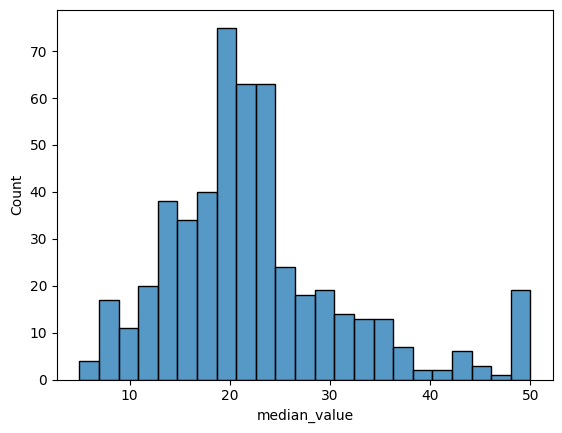

In [28]:
sns.histplot(y)

In [29]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.3,random_state=42)



all regressors in one model

In [30]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)  # Disable output
}


In [31]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    print(f"📊 {name}")
    print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
    print(f"MAE     : {mean_absolute_error(y_test, y_pred):.3f}")
    print(f"MSE     : {mean_squared_error(y_test, y_pred):.3f}")
    print(f"RMSE    : {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
    print("-" * 40)

📊 Linear Regression
R² Score: 0.728
MAE     : 3.107
MSE     : 20.272
RMSE    : 4.502
----------------------------------------
📊 Ridge Regression
R² Score: 0.727
MAE     : 3.096
MSE     : 20.335
RMSE    : 4.509
----------------------------------------
📊 Lasso Regression
R² Score: 0.706
MAE     : 3.155
MSE     : 21.888
RMSE    : 4.679
----------------------------------------
📊 KNN Regressor
R² Score: 0.753
MAE     : 2.596
MSE     : 18.422
RMSE    : 4.292
----------------------------------------
📊 Decision Tree
R² Score: 0.839
MAE     : 2.532
MSE     : 11.962
RMSE    : 3.459
----------------------------------------
📊 Random Forest
R² Score: 0.869
MAE     : 2.094
MSE     : 9.731
RMSE    : 3.119
----------------------------------------
📊 AdaBoost
R² Score: 0.807
MAE     : 2.842
MSE     : 14.415
RMSE    : 3.797
----------------------------------------
📊 SVR
R² Score: 0.662
MAE     : 2.878
MSE     : 25.222
RMSE    : 5.022
----------------------------------------
📊 XGBoost
R² Score: 0.873
MAE 

Creating a comparision table

In [32]:
results=[]

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    results.append({

    
    "Model":name,
    "MSE":mean_squared_error(y_test,y_pred),
    "R2": r2_score(y_test,y_pred),
    "MAE": mean_absolute_error(y_test,y_pred),
    "RMSE":np.sqrt(mean_absolute_error(y_test,y_pred))

    })
    
    results_df=pd.DataFrame(results).sort_values(by='R2',ascending=False)
    

In [33]:
results_df

,Model,MSE,R2,MAE,RMSE
9,CatBoost,8.615214,0.884380,1.866232,1.366101
8,XGBoost,9.495030,0.872572,2.088386,1.445125
5,Random Forest,9.568249,0.871590,2.079599,1.442081
6,AdaBoost,16.831119,0.774119,2.851142,1.688532
3,KNN Regressor,18.421974,0.752769,2.596316,1.611309
4,Decision Tree,19.288158,0.741144,2.667105,1.633127
0,Linear Regression,20.271593,0.727946,3.106686,1.762579
1,Ridge Regression,20.335473,0.727089,3.095933,1.759526
2,Lasso Regression,21.888474,0.706247,3.154955,1.776219
7,SVR,25.221874,0.661511,2.878481,1.696609


from the above regressor models we can see that catboost is the best performer

NOW TO PERFORM VISUALIZATIONS BETEEEN PREDICTED AND ACTUAL VALUES

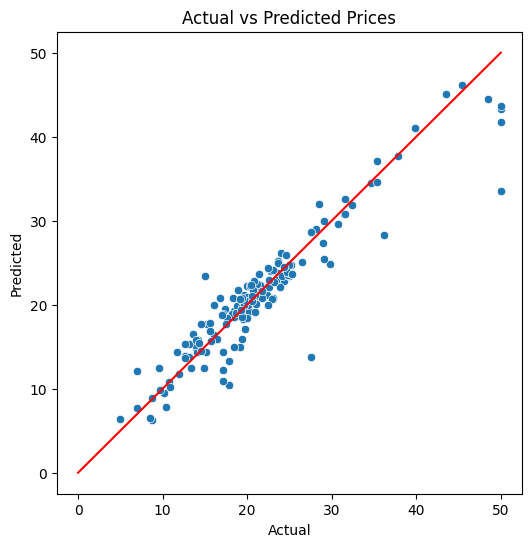

In [34]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Prices")
plt.plot([0, 50], [0, 50], color='red')
plt.show()


RESIDUAL PLOTS

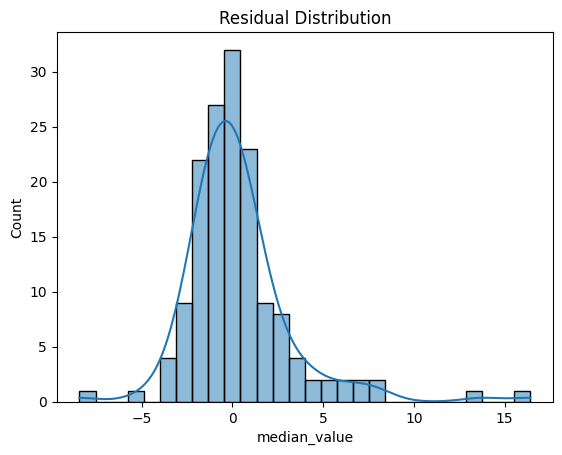

In [35]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
